# Исследование бизнес-показателей компании

**Цель исследования:**

Выявить причины, послужившие снижению выручки в развлекательном приложении Procrastinate Pro+, для:
1. завершения этапа убытков и 
2. выхода компании на положительные значения бизнес-показателей

**Ход исследования:**

Исследование состоит из следующих этапов:
- изучение общей информации о данных
- осуществление предобработки данных
- проведение исследовательского анализа данных
- проверка гипотез в ходе исследования бизнес-показателей
- подготовка заключительных выводов

## Изучение общей информации

In [1]:
#импортируем библиотеки, считываем данные из csv-файлов в датафрейм и сохраним в переменные
import pandas as pd
from datetime import datetime
from datetime import timedelta
import numpy as np

visits = pd.read_csv('/Users/ekaterina/Desktop/Проект 7/visits_info_short.csv')
orders = pd.read_csv('/Users/ekaterina/Desktop/Проект 7/orders_info_short.csv')
expenses = pd.read_csv('/Users/ekaterina/Desktop/Проект 7/costs_info_short.csv')

рассмотрим каждый датафрейм по отдельности

In [2]:
visits.head(15)

User Id         Region   Device         Channel        Session Start  \
0   981449118918  United States   iPhone         organic  2019-05-01 02:36:01   
1   278965908054  United States   iPhone         organic  2019-05-01 04:46:31   
2   590706206550  United States      Mac         organic  2019-05-01 14:09:25   
3   326433527971  United States  Android          TipTop  2019-05-01 00:29:59   
4   349773784594  United States      Mac         organic  2019-05-01 03:33:35   
5    90242400005  United States   iPhone  RocketSuperAds  2019-05-01 07:14:52   
6    43958116050  United States  Android         organic  2019-05-01 09:03:21   
7   185365244969  United States   iPhone         organic  2019-05-01 09:37:03   
8   446013509831  United States   iPhone  RocketSuperAds  2019-05-01 10:26:00   
9   100970711362  United States      Mac          TipTop  2019-05-01 04:39:53   
10  589320347244  United States      Mac         YRabbit  2019-05-01 18:39:23   
11  370455852550  United States   iPhone         organic  2019-05-01 14:44:30   
12  141837741427  United States      Mac        FaceBoom  2019-05-01 06:20:48   
13  924308873083  United States   iPhone         organic  2019-05-01 20:03:52   
14  774938424092  United States   iPhone    MediaTornado  2019-05-01 14:01:40   

            Session End  
0   2019-05-01 02:45:01  
1   2019-05-01 04:47:35  
2   2019-05-01 15:32:08  
3   2019-05-01 00:54:25  
4   2019-05-01 03:57:40  
5   2019-05-01 08:19:56  
6   2019-05-01 10:08:39  
7   2019-05-01 10:00:43  
8   2019-05-01 10:59:17  
9   2019-05-01 04:57:05  
10  2019-05-01 20:03:15  
11  2019-05-01 15:41:24  
12  2019-05-01 06:54:33  
13  2019-05-01 20:19:34  
14  2019-05-01 14:29:24

In [3]:
#выведем основную информацию
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
orders.head(15)

User Id             Event Dt  Revenue
0   188246423999  2019-05-01 23:09:52     4.99
1   174361394180  2019-05-01 12:24:04     4.99
2   529610067795  2019-05-01 11:34:04     4.99
3   319939546352  2019-05-01 15:34:40     4.99
4   366000285810  2019-05-01 13:59:51     4.99
5   129100331057  2019-05-01 01:56:28     4.99
6   626807144131  2019-05-01 02:39:21     4.99
7   914062168985  2019-05-01 02:02:18     4.99
8   769669137453  2019-05-01 03:39:47     4.99
9   434198630691  2019-05-01 18:16:50     5.99
10  846285993293  2019-05-01 13:14:07     4.99
11   64474110919  2019-05-01 02:21:45     4.99
12   68752468250  2019-05-01 20:25:33     4.99
13  946239768828  2019-05-01 21:11:24     4.99
14  872148430066  2019-05-01 09:18:02     4.99

In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [6]:
expenses.head(15)

dt   Channel  costs
0   2019-05-01  FaceBoom  113.3
1   2019-05-02  FaceBoom   78.1
2   2019-05-03  FaceBoom   85.8
3   2019-05-04  FaceBoom  136.4
4   2019-05-05  FaceBoom  122.1
5   2019-05-06  FaceBoom  118.8
6   2019-05-07  FaceBoom  101.2
7   2019-05-08  FaceBoom  100.1
8   2019-05-09  FaceBoom   93.5
9   2019-05-10  FaceBoom  104.5
10  2019-05-11  FaceBoom  132.0
11  2019-05-12  FaceBoom  100.1
12  2019-05-13  FaceBoom  105.6
13  2019-05-14  FaceBoom   92.4
14  2019-05-15  FaceBoom  100.1

In [7]:
expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


**Общий вывод:**

1. `visits` - 309 901 запись, пропущенных значений нет, требуется вставить нижнее подчеркивание и изменить регистр в названиях столбцов и привести столбцы с началом и концом сессии к типу datetime

2. `orders` - 40 212 записей, пропущенных значений нет, требуется вставить нижнее подчеркивание и изменить регистр в названиях столбцов и привести столбец с событием к типу datetime

3. `expenses` - 1800 записей, пропущенных значений нет, требуется изменить регистр в названии столбца и привести столбец с датой к типу date

## Предобработка данных

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

### Настройка регистра

заменим заглавные буквы на прописные в названиях столбцов, а также заменим пробелы на знак нижнего подчеркивания

In [8]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
visits

user_id         region   device         channel  \
0       981449118918  United States   iPhone         organic   
1       278965908054  United States   iPhone         organic   
2       590706206550  United States      Mac         organic   
3       326433527971  United States  Android          TipTop   
4       349773784594  United States      Mac         organic   
...              ...            ...      ...             ...   
309896  329994900775             UK       PC         LeapBob   
309897  334903592310         France       PC  lambdaMediaAds   
309898  540102010126        Germany       PC         organic   
309899  308736936846        Germany      Mac         organic   
309900  109329042535        Germany       PC  lambdaMediaAds   

              session_start          session_end  
0       2019-05-01 02:36:01  2019-05-01 02:45:01  
1       2019-05-01 04:46:31  2019-05-01 04:47:35  
2       2019-05-01 14:09:25  2019-05-01 15:32:08  
3       2019-05-01 00:29:59  2019-05-01 00:54:25  
4       2019-05-01 03:33:35  2019-05-01 03:57:40  
...                     ...                  ...  
309896  2019-10-31 13:28:12  2019-10-31 14:39:29  
309897  2019-10-31 22:14:52  2019-10-31 22:39:36  
309898  2019-10-31 01:40:48  2019-10-31 01:41:31  
309899  2019-10-31 07:37:34  2019-10-31 07:37:55  
309900  2019-10-31 14:17:43  2019-10-31 15:17:04  

[309901 rows x 6 columns]

In [9]:
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
orders

user_id             event_dt  revenue
0      188246423999  2019-05-01 23:09:52     4.99
1      174361394180  2019-05-01 12:24:04     4.99
2      529610067795  2019-05-01 11:34:04     4.99
3      319939546352  2019-05-01 15:34:40     4.99
4      366000285810  2019-05-01 13:59:51     4.99
...             ...                  ...      ...
40207  651604369137  2019-10-31 16:19:07     4.99
40208  275341387049  2019-10-31 01:17:17     4.99
40209  374656616484  2019-10-31 06:17:29     4.99
40210  168548862926  2019-10-31 22:46:19     4.99
40211  329994900775  2019-10-31 13:29:06     4.99

[40212 rows x 3 columns]

In [10]:
expenses.columns = expenses.columns.str.lower()
expenses

dt         channel  costs
0     2019-05-01        FaceBoom  113.3
1     2019-05-02        FaceBoom   78.1
2     2019-05-03        FaceBoom   85.8
3     2019-05-04        FaceBoom  136.4
4     2019-05-05        FaceBoom  122.1
...          ...             ...    ...
1795  2019-10-23  lambdaMediaAds    4.0
1796  2019-10-24  lambdaMediaAds    6.4
1797  2019-10-25  lambdaMediaAds    8.8
1798  2019-10-26  lambdaMediaAds    8.8
1799  2019-10-27  lambdaMediaAds   12.0

[1800 rows x 3 columns]

привели названия всех столбцов к нижнему регистру и змеиному стилю

### Определение пропущенных значений

In [11]:
visits.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [12]:
orders.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [13]:
expenses.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

убедились, что пропущенных значений нет

### Изменение типов данных

#### столбец  `session_start`

In [14]:
visits['session_start'] = pd.to_datetime(visits['session_start'])

#### столбец  `session_end`

In [15]:
visits['session_end'] = pd.to_datetime(visits['session_end'])

#### столбец  `event_dt`

In [16]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

#### столбец  `dt`

In [17]:
expenses['dt'] = pd.to_datetime(expenses['dt']).dt.date

изменили типы данных у дат 

In [18]:
visits.info()
orders.info()
expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.

### Устранение явных и неявных дубликатов

проверим данные на наличие явных дубликатов

In [19]:
visits.duplicated().sum()

0

явных дубликатов нет

In [20]:
orders.duplicated().sum()

0

явных дубликатов нет

In [21]:
expenses.duplicated().sum()

0

явных дубликатов нет

проверим данные на наличие неявных дубликатов

In [22]:
visits['user_id'].value_counts()

33606575057     46
943775408561    36
901180916748    35
870784569391    34
764086596354    33
                ..
214203066007     1
369265191867     1
346271445800     1
133742530598     1
279181973476     1
Name: user_id, Length: 150008, dtype: int64

In [23]:
visits['region'].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

In [24]:
visits['device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

In [25]:
visits['session_start'].value_counts()

2019-06-27 14:56:41    3
2019-10-15 09:47:57    3
2019-08-25 08:20:51    3
2019-10-10 22:50:07    3
2019-10-22 17:17:39    3
                      ..
2019-08-10 14:18:14    1
2019-08-10 05:32:58    1
2019-08-10 02:14:48    1
2019-08-10 12:40:46    1
2019-10-31 14:17:43    1
Name: session_start, Length: 306813, dtype: int64

In [26]:
visits['session_end'].value_counts()

2019-07-16 02:23:30    3
2019-07-29 11:21:53    3
2019-08-03 06:31:26    3
2019-08-20 15:27:15    3
2019-09-23 20:37:13    3
                      ..
2019-08-10 14:15:39    1
2019-08-11 00:05:05    1
2019-08-10 23:01:52    1
2019-08-10 04:21:45    1
2019-10-31 15:17:04    1
Name: session_end, Length: 306793, dtype: int64

In [27]:
orders['user_id'].value_counts()

901180916748    22
883098437811    20
75337957494     19
512471511263    19
295795879965    19
                ..
829252887757     1
499471996783     1
847348136580     1
390188868722     1
168548862926     1
Name: user_id, Length: 8881, dtype: int64

In [28]:
orders['event_dt'].value_counts()

2019-10-26 06:49:22    2
2019-06-27 06:09:53    2
2019-09-14 23:35:11    2
2019-10-05 08:23:22    2
2019-10-11 20:55:22    2
                      ..
2019-08-20 02:51:09    1
2019-08-20 06:58:44    1
2019-08-20 14:41:23    1
2019-08-20 18:09:32    1
2019-10-31 13:29:06    1
Name: event_dt, Length: 40163, dtype: int64

In [29]:
orders['revenue'].value_counts()

4.99     38631
5.99       780
9.99       385
49.99      212
19.99      204
Name: revenue, dtype: int64

In [30]:
expenses['dt'].value_counts()

2019-05-01    10
2019-08-22    10
2019-08-24    10
2019-08-25    10
2019-08-26    10
              ..
2019-07-01    10
2019-07-02    10
2019-07-03    10
2019-07-04    10
2019-10-27    10
Name: dt, Length: 180, dtype: int64

In [31]:
expenses['channel'].value_counts()

FaceBoom              180
MediaTornado          180
RocketSuperAds        180
TipTop                180
YRabbit               180
AdNonSense            180
LeapBob               180
OppleCreativeMedia    180
WahooNetBanner        180
lambdaMediaAds        180
Name: channel, dtype: int64

In [32]:
expenses['costs'].value_counts()

6.40      26
3.36      21
9.60      20
16.80     19
11.55     17
          ..
203.30     1
184.30     1
186.20     1
172.90     1
2.40       1
Name: costs, Length: 608, dtype: int64

неявных дубликатов нет

### Устранение аномалий

In [33]:
orders['revenue'].describe()

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: revenue, dtype: float64

In [34]:
expenses['costs'].describe()

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

данные корректны

### Добавление функций для расчёта и анализа LTV, ROI, удержания и конверсии.

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

### Функция для создания профилей пользователей

In [35]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Функция для подсчета Retention Rate

In [36]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для подсчета конверсии

In [37]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для подсчета LTV

In [38]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Функция для сглаживания данных

In [39]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### Функция для построения графика Retention Rate

In [40]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

### Функция для построения графика конверсии

In [41]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Функция для визуализации LTV и ROI

In [42]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

добавлены функции для расчета и анализа бизнес-показателей

**Вывод:**

**1. Изменены типы данных:**
- `session_start` - с объектного на дату
- `session_end` - с объектного на дату 
- `event_dt` - с объектного на дату
- `dt` - с объектного на дату без обозначения времени

**2. Настроен нижний регистр в названиях столбцов**

**3. Соблюден змеиный регистр в названиях столбцов**

**4. Данные проверены на пропущенные значения, наличие явных и неявных дубликатов, аномалий**

**5. Заданы функции для расчета и анализа LTV, ROI, удержания и конверсии**

## Исследовательский анализ данных

### Профили пользователей

составим профили пользователей

In [43]:
profiles = get_profiles(visits, orders, None, expenses)
profiles

user_id            first_ts       channel  device         region  \
0             599326 2019-05-07 20:58:57      FaceBoom     Mac  United States   
1            4919697 2019-07-09 12:46:07      FaceBoom  iPhone  United States   
2            6085896 2019-10-01 09:58:33       organic  iPhone         France   
3           22593348 2019-08-22 21:35:48    AdNonSense      PC        Germany   
4           31989216 2019-10-02 00:07:44       YRabbit  iPhone  United States   
...              ...                 ...           ...     ...            ...   
150003  999956196527 2019-09-28 08:33:02        TipTop  iPhone  United States   
150004  999975439887 2019-10-21 00:35:17       organic      PC             UK   
150005  999976332130 2019-07-23 02:57:06        TipTop  iPhone  United States   
150006  999979924135 2019-09-28 21:28:09  MediaTornado      PC  United States   
150007  999999563947 2019-10-18 19:57:25       organic  iPhone  United States   

                dt      month  payer  acquisition_cost  
0       2019-05-07 2019-05-01   True          1.088172  
1       2019-07-09 2019-07-01  False          1.107237  
2       2019-10-01 2019-10-01  False          0.000000  
3       2019-08-22 2019-08-01  False          0.988235  
4       2019-10-02 2019-10-01  False          0.230769  
...            ...        ...    ...               ...  
150003  2019-09-28 2019-09-01  False          3.500000  
150004  2019-10-21 2019-10-01  False          0.000000  
150005  2019-07-23 2019-07-01  False          2.600000  
150006  2019-09-28 2019-09-01  False          0.205714  
150007  2019-10-18 2019-10-01  False          0.000000  

[150008 rows x 9 columns]

определим минимальную и максимальную дату привлечения пользователей

In [44]:
min_analysis_date = profiles['dt'].min()
min_analysis_date

datetime.date(2019, 5, 1)

In [45]:
max_analysis_date = profiles['dt'].max()
max_analysis_date

datetime.date(2019, 10, 27)

Минимальная и максимальная даты привлечения пользователей соответствуют ТЗ. Нам доступны данные компании о пользователях, привлечённых с 1 мая 2019 (минимальная дата) по 27 октября 2019 года (максимальная дата).

### Страны

выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей

In [46]:
users_region = profiles.groupby('region').agg({'user_id': 'nunique', 'payer': 'sum'}).sort_values(by='user_id', ascending=False)
users_region ['%'] = round((users_region['payer'] / users_region['user_id'] * 100), 2)
users_region.sort_values(by='%', ascending=False)

user_id  payer     %
region                             
United States   100002   6902  6.90
Germany          14981    616  4.11
UK               17575    700  3.98
France           17450    663  3.80

**Вывод:**

Больше всего пользователей приходит из США (100 тыс.). Примерно поровну пользователей из Великобритании (17,5 тыс.) и Франции (17,4 тыс.). Меньше всего пользователей из Германии (14,9 тыс.).

Аналогично больше всего платящих пользователей из США (6,9%), но далее Германия (4,1%) обгоняет Великобританию (3,9%) и Францию (3,7%) по данному показателю.

### Устройства

выясним, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи

In [47]:
users_device = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': 'sum'}).sort_values(by='payer', ascending=False)
users_device ['%'] = round((users_device['payer'] / users_device['user_id'] * 100), 2)
users_device.sort_values(by='%', ascending=False)

user_id  payer     %
device                       
Mac        30042   1912  6.36
iPhone     54479   3382  6.21
Android    35032   2050  5.85
PC         30455   1537  5.05

**Вывод:**

Клиенты пользуются наиболее активно IPhone (54,4 тыс.). Далее следует Android (35 тыс.). Примерно поровну распределилось количество клиентов, пользующихся Mac (30 тыс.) и PC (30,4).

Больше всего платящих пользователей используют Mac (6,3%), хотя пользователи IPhone (6,2%) имеют близкий к первому показатель. Пользователи Android (5,8%) платят несколько меньше, тогда как меньше всего совершают покупок владельцы PC (5%).

### Рекламные источники

изучим рекламные источники привлечения и каналы, из которых пришло больше всего платящих пользователей

In [48]:
channel = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': 'sum'}).sort_values(by='payer', ascending=False)
channel ['%'] = round((channel['payer'] / channel['user_id'] * 100), 2)
channel.sort_values(by='%', ascending=False)

user_id  payer      %
channel                                  
FaceBoom              29144   3557  12.20
AdNonSense             3880    440  11.34
lambdaMediaAds         2149    225  10.47
TipTop                19561   1878   9.60
RocketSuperAds         4448    352   7.91
WahooNetBanner         8553    453   5.30
YRabbit                4312    165   3.83
MediaTornado           4364    156   3.57
LeapBob                8553    262   3.06
OppleCreativeMedia     8605    233   2.71
organic               56439   1160   2.06

**Вывод:**

Большинство пользователей пришло сами по себе (56,4 тыс.), а также из таких рекламынх каналов, как FaceBoom (29,1 тыс.) и TipTop (19, 5 тыс.).

Наиболее платежеспособными оказались клиенты, пришедшие из канала FaceBoom (12%), AdNonSense (11,3%) и lambdaMediaAds (10,4%).

**Общий вывод:**

В ходе исследовательского анализа были получены следующие инсайты:

1. Самая популярная страна происхождения всех пользователей и отдельно платящих пользователей приложения - США (100 тыс. и 6,9%).

2. Самое распространенное устройство среди всех пользователей - IPhone (54,4 тыс.), а среди платящих - Mac (6,3%).

3. Наибольший трафик в приложение приходит из рекламного канала среди всех пользователей и только платящих пользователей - FaceBoom (29,1 тыс. и 12,2%).

## Маркетинг

### Общая сумма расходов на маркетинг

посчитаем общую сумму расходов на маркетинг

In [49]:
expenses['costs'].sum().round(2)

105497.3

суммарно на маркетинг затратили 105 497,3 у.е.

### Распределение расходов на маркетинг по рекламным источниками

выясним, как траты распределены по рекламным источникам

In [50]:
costs_channel = expenses.groupby('channel').sum('costs').sort_values(by='costs', ascending=False)
costs_channel ['%'] = round((costs_channel['costs'] / costs_channel['costs'].sum() * 100), 2)
costs_channel

costs      %
channel                            
TipTop              54751.30  51.90
FaceBoom            32445.60  30.75
WahooNetBanner       5151.00   4.88
AdNonSense           3911.25   3.71
OppleCreativeMedia   2151.25   2.04
RocketSuperAds       1833.00   1.74
LeapBob              1797.60   1.70
lambdaMediaAds       1557.60   1.48
MediaTornado          954.48   0.90
YRabbit               944.22   0.90

**Вывод:**

Половина всех затрат маркетингового бюджета (51,9%) приходится на рекламный канал TipTop. Треть бюджета отводится на FaceBoom (30,75%). Остальной бюджет минимально распределен по оставшимся каналам.

### Динамика изменения расходов во времени

построим визуализацию динамики изменения расходов по каждому источнику

поделим рекламные каналы на крупные и мелкие, чтобы избежать накладывания мелких каналов друг на друга

In [51]:
expenses['dt'] = pd.to_datetime(expenses['dt'])
expenses['week'] = expenses['dt'].dt.isocalendar().week
expenses['month'] = expenses['dt'].dt.month

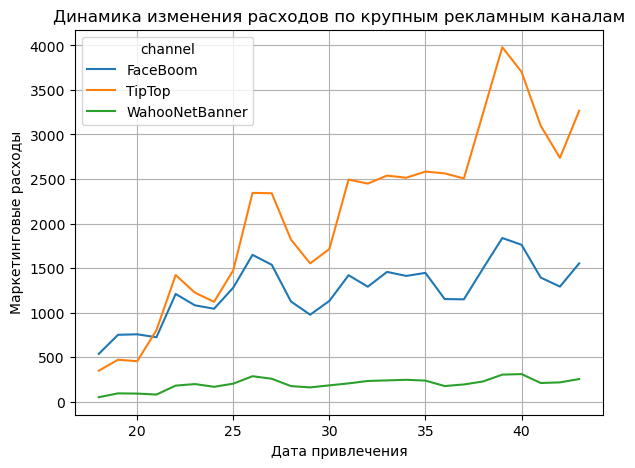

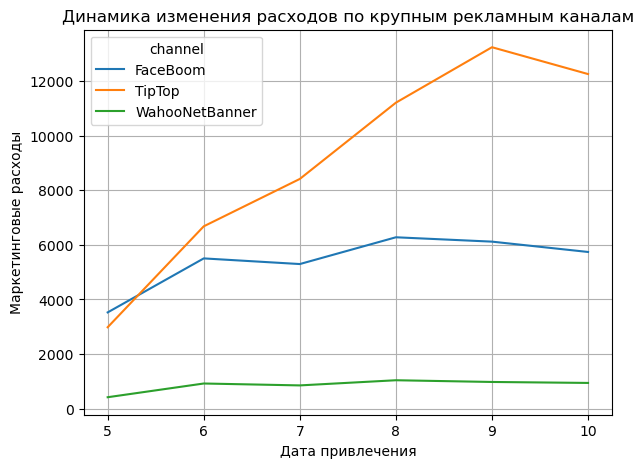

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

expenses.query('channel in ["TipTop", "FaceBoom", "WahooNetBanner"]').pivot_table(index='week', columns='channel', values='costs', aggfunc='sum').plot(grid=True, figsize=(15, 5), ax = plt.subplot(1, 2, 1))
plt.ylabel('Маркетинговые расходы')
plt.xlabel('Дата привлечения')
plt.title('Динамика изменения расходов по крупным рекламным каналам')
plt.show()

expenses.query('channel in ["TipTop", "FaceBoom", "WahooNetBanner"]').pivot_table(index='month', columns='channel', values='costs', aggfunc='sum').plot(grid=True, figsize=(15, 5), ax = plt.subplot(1, 2, 2))
plt.ylabel('Маркетинговые расходы')
plt.xlabel('Дата привлечения')
plt.title('Динамика изменения расходов по крупным рекламным каналам')
plt.show()

**Вывод:**

Динамика изменения расходов по крупным каналам по неделям демонстрирует четкое распределение затрат по каналам. До июля каналы TipTop и FaceBoom имели идентичные расходы, после чего начали расходиться: существенно увеличились затраты на TipTop (с 80 до 600), тогда как на FaceBoom уменьшились (со 100 до 250). На канал WahooNetBanner расходовалось меньше всего средств (от 10 до 40).

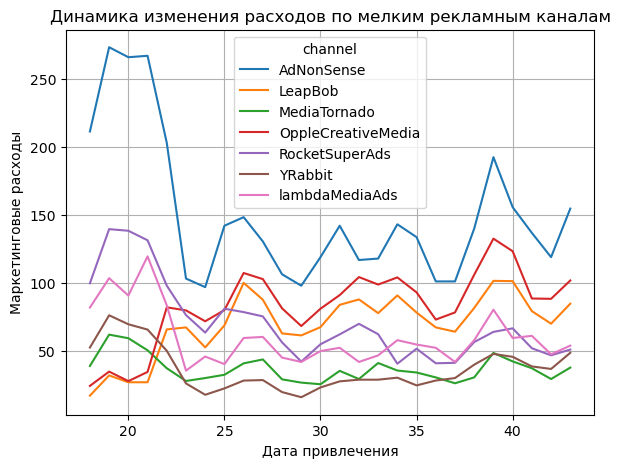

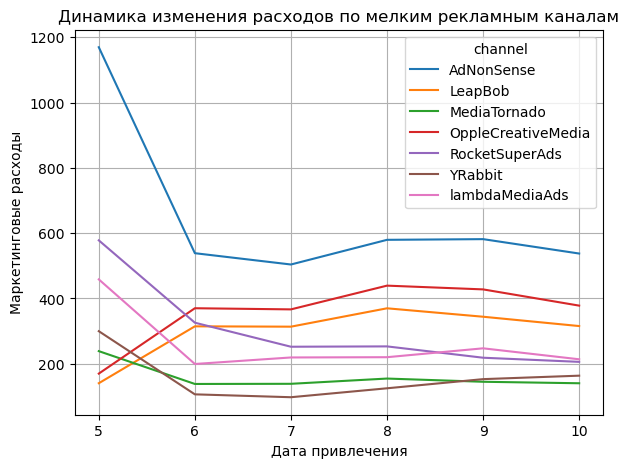

In [53]:
expenses['month'] = expenses['dt'].dt.month
expenses.query('channel not in ["TipTop", "FaceBoom", "WahooNetBanner"]').pivot_table(index='week', columns='channel', values='costs', aggfunc='sum').plot(grid=True, figsize=(15, 5), ax = plt.subplot(1, 2, 1))
plt.ylabel('Маркетинговые расходы')
plt.xlabel('Дата привлечения')
plt.title('Динамика изменения расходов по мелким рекламным каналам')
plt.show()

expenses.query('channel not in ["TipTop", "FaceBoom", "WahooNetBanner"]').pivot_table(index='month', columns='channel', values='costs', aggfunc='sum').plot(grid=True, figsize=(15, 5), ax = plt.subplot(1, 2, 2))
plt.ylabel('Маркетинговые расходы')
plt.xlabel('Дата привлечения')
plt.title('Динамика изменения расходов по мелким рекламным каналам')
plt.show()

визуализируем все на одном графике

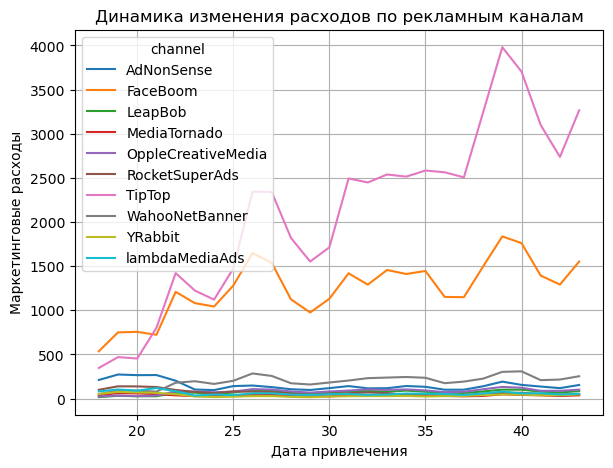

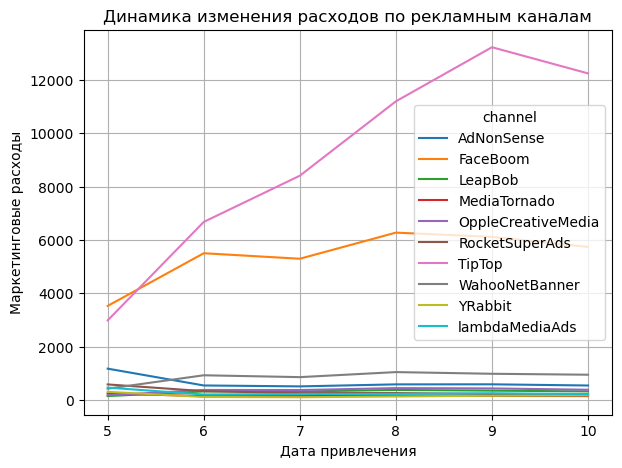

In [54]:
expenses.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum').plot(grid=True, figsize=(15, 5), ax = plt.subplot(1, 2, 1))
plt.ylabel('Маркетинговые расходы')
plt.xlabel('Дата привлечения')
plt.title('Динамика изменения расходов по рекламным каналам')
plt.show()

expenses.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum').plot(grid=True, figsize=(15, 5), ax = plt.subplot(1, 2, 2))
plt.ylabel('Маркетинговые расходы')
plt.xlabel('Дата привлечения')
plt.title('Динамика изменения расходов по рекламным каналам')
plt.show()

визуализируем все на одном графике с помощью функции сглаживания данных

**Вывод:**

Среди более мелких каналов траты менее очевидны по недельной динамике, тогда как по месячной четко демонстрируется первенство канала AdNonSense (с 1200 до 600) среди других, но и падение расходов на него. Рост бюджета отмечен у каналов OppleCreativeMedia (со 190 до 400) и LeapBob (со 180 до 370).

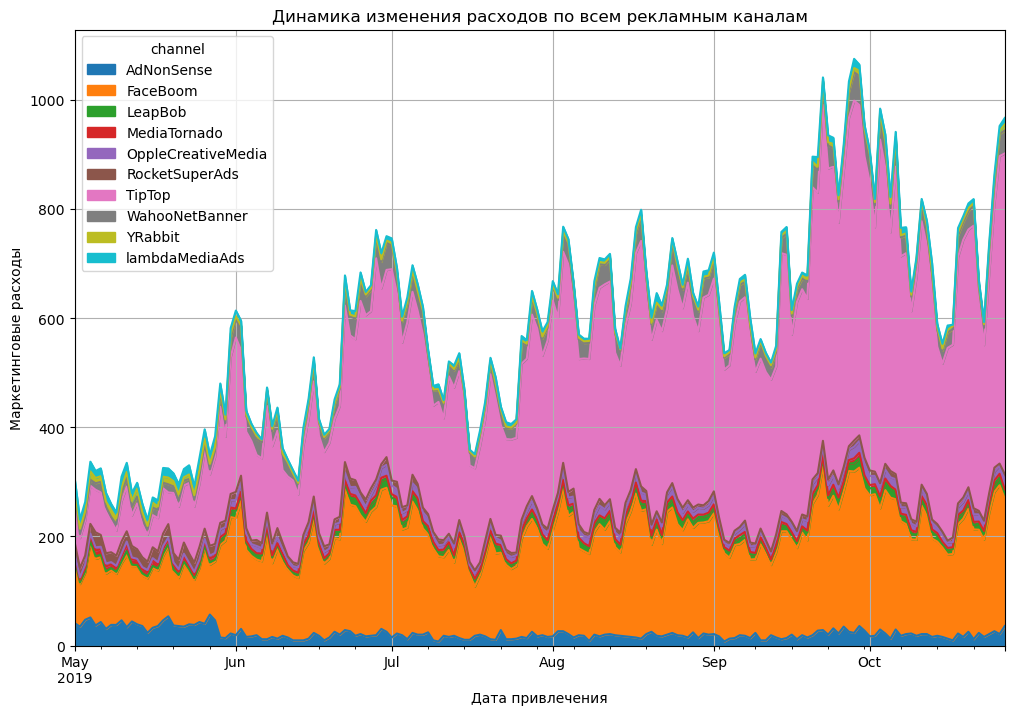

In [55]:
filtered_data = expenses.pivot_table(index='dt', columns='channel', values='costs', aggfunc='sum')
filtered_data.plot.area(figsize=(12, 8), grid=True) 

plt.title('Динамика изменения расходов по всем рекламным каналам')
plt.xlabel('Дата привлечения')
plt.ylabel('Маркетинговые расходы')
plt.show()

На TipTop, FaceBoom и WahooNetBanner приходится, как подтвердилось ранее, больше всего маркетингового бюджета во времени

### Средняя стоимость привлечения одного пользователя (CAC)

выясним, сколько в среднем стоило привлечение одного пользователя из каждого источника

In [56]:
cac = profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).sort_values(by='acquisition_cost', ascending = False)
cac

acquisition_cost
channel                             
TipTop                      2.799003
FaceBoom                    1.113286
AdNonSense                  1.008054
lambdaMediaAds              0.724802
WahooNetBanner              0.602245
RocketSuperAds              0.412095
OppleCreativeMedia          0.250000
YRabbit                     0.218975
MediaTornado                0.218717
LeapBob                     0.210172
organic                     0.000000

посчитаем средний CAC

In [57]:
profiles['acquisition_cost'].mean().round(2)

AttributeError: 'float' object has no attribute 'round'

один пользователь обходится нам приблизительно в 1.13 у.е.

**Вывод:**

Самый высокий показатель CAC, учитывая средний CAC по проекту, имеет канал TipTop (2,79). Каналы FaceBoom и AdNonSense имеют приблизительно один показатель CAC - 1, чуть ниже среднего. Для остальных каналов средняя стоимость привлечения пользователей меньше 1.

**Общий вывод:**

В ходе маркетингового анализа мы пришли к следующим выводам:

1. Общая сумма расходов на маркетинг - 105 497 у.е.

2. Самые высокие маркетинговые затраты на рекламные каналы TipTop (54 тыс., 51,9%), FaceBoom (32 тыс., 30,7%) и WahooNetBanner (5 тыс., 4,8%).

3. Динамика изменения расходов во времени подтвердила первенство и рост затрат на канал TipTop (c 3000 в мае до 1210 в октябре). Вторая позиция закрепилась у канала FaceBoom, расходы на который упали затрат с августа (с 3800 в мае до 6000 в октябре). Тройку лидеров закрывает канал WahooNetBanner с относительно предыдыдущих двух каналов стабильными затратами на него (с 600 в мае до 1000 в октябре).

4. Среди остальных каналов выделились AdNonSense, затраты на который упали с июля (с 1800 в мае до 580 в октябре).

5. Самая высокая средняя стоимость привлечения одного пользователя - канал TipTop (2,79), а также каналы FaceBoom (1,1) и AdNonSense (1).

## Оценка окупаемости рекламы

### Графики LTV и ROI, динамика LTV, CAC и ROI

отбросим значения органических пользователей, которые пришли бесплатно в приложение

In [ ]:
profiles = profiles.query('channel != "organic"')

установим момент и горизонт анализа

In [ ]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

построим графики LTV и ROI и графики динамики LTV, CAC и ROI

In [ ]:
#считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days)

In [ ]:
#строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Вывод:**

1. LTV: кривая не снижается, плавно растет от нуля с возможным пересечением единицы, следовательно момент и горизонт анализа заданы верно. Таким образом, возрастает выручка от покупок клиентов.
2. Динамика LTV: ценность клиента стабильна, сезонный фактор не оказывывает сильного воздействия.
3. CAC: стоимость привлечения клиента растет, рекламный бюджет увеличивается.
4. ROI: реклама не достигает уровня окупаемости, доходит до значения 80% в конце срока.
5. Динамика ROI: до июля реклама окупалась, пересекая красную линию, далее снизилась со 100% до 60% в конце срока.

### Графики конверсии и динамики ее изменения

In [ ]:
#считаем конверсию
dimensions = []
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, horizon_days, dimensions=dimensions)

In [ ]:
#строим конверсию
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Вывод:**

1. Конверсия: кривая не снижается, плавно растет от нуля в направлении единицы, следовательно пользователи хорошо конвертируются.
2. Динамика конверсии: конверсия имеет несколько пиков и спадов, что возможно из-за увеличения рекламного бюджета в июне, который однако окупился на короткий период (полмесяца) и далее его эффект стал исчезать.

### Графики удержания и динамики удержания

In [ ]:
#считаем удержание
dimensions = []
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days, dimensions=dimensions)

In [ ]:
#строим удержание
plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:**

1. Удержание платящих: кривая убывает по экспоненциальному закону.
2. Удержание неплатящих: кривая убывает, падение происходит быстрее, чем у платящих пользователей, что является правильным.
3. Динамика удержания платящих: скачок в июне объясняется вливанием рекламного бюджета после недавнего спада в середине мая, который однако не обеспечил долгосрочной выручки компании. Удержание платящих выше удержания неплатящих.
4. Динамика удержания неплатящих: кривая стабильно держится на одном уровне.

### Графики LTV и ROI, динамика LTV, CAC и ROI по устройствам

In [ ]:
#считаем показатели с разбивкой по устройствам
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=dimensions)

In [ ]:
#строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

**Вывод:**

1. LTV: Mac, IPhone и Android имеют приблизительно один уровень ценности клиента (от 40% до 90%). При этом выделяется лидер - Mac (наибольшая доля платящих).
2. Динамика LTV: устройства пересекат друг друга на разных периодах. Виден рост в середине июня по всем устройствам. До августа максимальные значения имели Mac (от 70% до 110%) и IPhone (от 90% до 110%). Далее обозначился рост пользователей Android (от 80% до 110%).
3. CAC: виден рост затрат на пользователей Mac и IPhone, а также уступающий им рост Android и PC. 
4. ROI: Android окупается к концу срока на 90%, IPhone и Mac - на 70%. Наиболее прибыльным является PC - 110%.
5. Динамика ROI: лишь пользователи на PC смогли сохранить с мая до сентябрь окупаемости своей рекламы, тогда как остальные устройства после мая стали неприбыльными каналами, имея незначительные подъемы до 100% окупаемости вследствие рекламной кампании в июне.

Несмотря на вливание средств в рекламу для Mac и IPhone, инвестиции не окупаются. Это может быть одной из причин убытков компании.

### Графики LTV и ROI, динамика LTV, CAC и ROI по странам

In [ ]:
#считаем показатели с разбивкой по странам
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=dimensions)

In [ ]:
#строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

**Вывод:**

1. LTV: наибольшая выручка исходит от пользователей из США - достигает 100% (ранее выяснили, что их больше всего). Пользователи из Великобритании, Германии и Франции находятся примерно на одном уровне (от 20% до 70%).
2. Динамика LTV: в июне динамика всех стран растет, но далее выручка от пользователей США начинает расти, а от остальных стран снижаться с дальнейшими пиками в сторону выручки американцев. Например, пересечение пользователей США с пользователями из Великобритании (август-сентябрь).
3. CAC: рекламный бюджет с июня растет в отношении пользователей США (от 80 тыс. до 180 тыс.). На пользователей другого происхождения затраты падают (от 60 тыс. до 40 тыс.).
4. Динамика ROI: подтверждается падение окупаемости рекламы для пользователей из США в июне, попытка достичь окупаемости в середине июня. Великобритания лидирует по окупаемости, за ней следует Германия и Франция, пересекая друг друга.

Несмотря на позитивные показатели пользователей США затраты на них не окупаются (от 25% до 70%) из-за высокой стоимости привлечения этих клиентов. В то время как реклама в других странах более выигрышная (от 50% до 150%).

### Графики LTV и ROI, динамика LTV, CAC и ROI по рекламным каналам

In [ ]:
#считаем показатели с разбивкой по рекламным каналам
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=dimensions)

In [ ]:
#строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

**Вывод:**

1. LTV: наиболее эффективные каналы lambdaMediaAds и TipTop (и распространенные, что подтверждено ранее). Лишь они достигают 100% выручки от клиентов. FaceBoom и AdNonSense, несмотря на высокие значения в начале срока снижаются. Вместе с RocketSuperAds они стремятся к 100% выручке.
2. Динамика LTV: lambdaMediaAds и TipTop лидируют: в июне произошел резкий рост их значений, но далее они снижались с некоторыми моментами подъемов.
3. CAC: на канал TipTop отводится наибольший маркетинговый бюджет компании. Видно, что бюджет вливается поэтапно раз в месяц (середина мая-июнь, середина июня-июль и т.д.). FaceBoom имеет стабильный уровень затрат, тогда как затраты на другие каналы меньше 100 тыс.
4. Динамика ROI: практически все каналы окупаются, кроме тех, куда вливается значительное количество средств. Видна существенная окупаемость среднего по количеству пользователей канала YRabbit в середине июля после порторных значительных маркетинговых затрат. 

Несмотря на внушительные расходы на TipTop, FaceBoom и AdNonSense, привлечение пользователей из них не окупается полностью (70-80%) возможно из-за высокой стоимости привлечения. Тогда как каналы, куда вливаются намного меньше средств, как YRabbit, MediaTornado, lambdaMediaAds, окупились еще на втором лайфтайме и выросли до 300% окупаемости.

для полноты картины посмотрим на конверсию и динамику конверсии, удержание и динамику удержания с той же разбивкой

### Графики конверсии и динамики конверсии по странам

In [ ]:
dimensions=['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Вывод:**

Больше всего конвертируется пользователей из США. Остальные страны с пересекающимися значениями на 60% ниже.

### Графики конверсии и динамики конверсии по устройствам

In [ ]:
dimensions=['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Вывод:**

Лучше конвертируются пользователи Mac и IPhone. Немного отстает Android. Конверсия PC на 30% ниже.

### Графики конверсии и динамики конверсии по рекламным каналам

In [ ]:
dimensions=['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Вывод:**

FaceBoom имеет лучшую конверсию. AdNonSense, lambdaMediaAds и TipTop следуют далее.

### Графики удержания и динамики удержания по странам

In [ ]:
dimensions=['region']

retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:**

Все, кроме американских платящих пользователей (несмотря на высокую конверсию), удерживаются более значительно. Среди неплатящих пользователей разбивка идентична платящим.

### Графики удержания и динамики удержания по устройствам

In [ ]:
dimensions=['device']

retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:**

Лучше всего удерживаются платящие пользователи PC, которые также имеют наивысшие показатели LTV и ROI. Остальные устройства имеют схожий уровень удержания платящих пользователей. Неплатящие пользователи практически не отличаются.

### Графики удержания и динамики удержания по рекламным каналам

In [ ]:
dimensions=['channel']

retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:**

Каналы с наибольшей стоимостью привлечения пользователя, AdNonSense и FaceBoom, удерживаются хуже всего. TipTop имеет средние значения удержания. Лучшие показатели у WahooNetBanner и RocketSuperAds.

**Общий вывод:**

На основе оценки окупаемости нам удалось узнать, что:

**по разбивке по устройству**

1. самая высокая стоимость привлечения одного пользователя у Mac и IPhone - около 150 тыс.,
2. несмотря на высокий уровень вкладываемых средств в Mac и IPhone, наибольшим уровнем окупаемости обладает PC (110%) (окупается на 10 лайфтайм), менее окупаем - Android (90%),
3. нет однозначного лидера среди показателя пожизненной стоимости клиента, но PC остает от других девайсов,
4. Mac и IPhone обладают наилучшей конверсией, опережая несколько показатель Android, но все они уступают PC по удержанию платящих пользователей,

**по разбивке по странам**

1. наибольшая выручка исходит от пользователей из США, достигая после 12 лайфтайма 100%,
2. на США приходится и больше всего расходов на привлечение пользователя ("ступенчатый" тип кривой) до 170 тыс., тогда как остальные страны существенно проседают,
3. однако высокие затраты не дают нужного эффекта и реклама американских пользователей не окупается (60%), а в странах, которым не уделялось крупных маркетинговых сумм, реклама окупается после 4 лайфтайма,
4. лучшая конверсия принадлежит пользователям из США, но удержание платящих пользователей оттуда уступает другим странам,

**по разбивке по рекламным каналам**

1. больше выручки исходит от каналов lambdaMediaAds и TipTop, которые на 4 и 6 лайфтаймы достигают 100%,
2. рекламный бюджет преимущественно вливается в канал TipTop ("ступенчатый" тип кривой) до 350 тыс., бюджет для FaceBoom держится стабильно на уровне 100%, остальные же каналы получают еще меньше вложений,
3. вопреки этому, окупается реклама каналов со средними расходами на привлечение пользователя - YRabbit, MediaTornado, lambdaMediaAds,
4. FaceBoom лучше всего привлекает трафик в приложение компании, но не способен эффективно удерживать пользователей наравне с AdNonSense. На первый план выходят WahooNetBanner и lambdaMediaAds, мелкие каналы со средними расходами на привлечение и конверсией.

Таким образом,
- **реклама**, направленная на привлечение пользователей в целом, **не окупается полностью**, достигая 80% к концу второй недели,
- она приближается к окупаемости, но не сможет окупиться не позднее, чем через две недели после привлечения,
- **негативно влияют** на окупаемость рекламы, не достигая 100%: **страны - США; устройства - Mac и IPhone; рекламные каналы - TipTop, FaceBoom и AdNonSense**.

**Проблемы окупаемости могут быть вызваны:**

- **высокими затратами на привлечение одного пользователя** для Mac и IPhone, пользователей из США и для рекламного канала TipTop при не достижении ими уровня окупаемости,
- неверно сделанным упором на эти переменные, **несбалансированным распределением средств**, тогда как окупаются пользователи, устройства и рекламные каналы с меньшими рекламными затратами на них,
- **возможными техническим ошибками**, с которыми столкнулись пользователи из США, владельцы Mac и IPhone, клиенты, привлеченные из FaceBoom и AdNonSense,
- **высокой численностью пользователей** из США (100 тыс.), пользователей, которые заходят в приложение через IPhone (54 тыс.) и узнают о нем из TipTop (19 тыс.) и FaceBoom (29 тыс.), но расходы на которых не окупаются, 
- **недостаточно длинным горизонтом анализа** в 14 дней, тогда как пользователи фактически окупятся к третьей неделе.

для окончательных выводов попробуем соотнести пользователей из разных стран с их любимыми устйроствами и рекламными каналами

## Соотношение пользователей

### Страна-устройство

In [ ]:
country_device = profiles.pivot_table(index='device', columns='region', values='user_id', aggfunc='nunique').sort_values(by='device', ascending=False)
country_device

**Вывод:**

- французы предпочитают PC,
- немцы - PC,
- англичане - PC,
- американцы - IPhone.

### Страна-рекламный канал

In [ ]:
country_channel = profiles.pivot_table(index='channel', columns='region', values='user_id', aggfunc='nunique')
country_channel

**Вывод:**

- французы, немцы и англичане приходят из OppleCreativeMedia, WahooNetBanner и LeapBob,
- американцы - из FaceBoom и TipTop.

### Устройство-рекламный канал

In [ ]:
device_channel = profiles.pivot_table(index='device', columns='channel', values='user_id', aggfunc='nunique')
device_channel

**Вывод:**

- пользователи Android приходят из FaceBoom и TipTop,
- Mac - FaceBoom и TipTop,
- PC - OppleCreativeMedia, WahooNetBanner и LeapBob,
- IPhone - FaceBoom и TipTop.

**Общий вывод:**

Отсутствие окупаемости у пользователей из США, владельцев техники Apple -  Mac и IPhone, а также пользователей, приходящих из TipTop и FaceBoom, взаимосвязано.

**Пользователь из США** действительно предпочитает Mac и IPhone и приходит чаще из каналов FaceBoom и TipTop.

**Пользователь из Европы** (Германия, Франция, Великобритания) больше использует PC и приходит в приложение компании из OppleCreativeMedia, WahooNetBanner и LeapBob. Именно устройство и рекламные каналы окупаются для компании. Заметим, что эти каналы имеют высокий ROI, удержание пользователей, но проседают в конверсии и LTV, что исправимо в будущем.

## Общий вывод

**Исследование бизнес-показателей компании** 

Была решена следующая **задача:** выявлены причины, послужившие снижению выручки в развлекательном приложении Procrastinate Pro+.

**Использованные входные данные:** данные компании о пользователях, привлеченных с 1 мая по 27 октября 2019 года: лог сервера с данными об их посещениях, выгрузка их покупок за этот период, рекламные расходы.

1. Былы осуществлены **изучение общей информации** о предоставленных данных и их **предобработка**:

    - восстановлен единый стиль названий столбцов датафрейма (приведены к нижнему регистру и добавлены знаки нижнего подчеркивания),
    - проверены данные на пропущенные значения (не найдены),
    - проверены данные на явные и неявные дубликаты (не найдены),
    - проверены данные на аномальные значения (не найдены),
    - изменены типы данных (обозначение даты),
    - заданы функции для расчета и анализа LTV, ROI, удержания и конверсии.
    

2. Были **изучены взаимосвязи между значениями датафрейма** и **получены следующие выводы** в ходе исследовательского анализа данных:

    - самая популярная страна происхождения всех пользователей и отдельно платящих пользователей приложения - США (100 тыс. и 6,9%).

    - самое распространенное устройство среди всех пользователей - IPhone (54,4 тыс.), среди платящих - Mac (6,3%).

    - наибольший трафик в приложение приходит из рекламного канала среди всех пользователей и только платящих пользователей - FaceBoom (29,1 тыс. и 12,2%).
    

3. Были созданы и сравнены **портреты пользователей игр из разных регионов**:

    - общая сумма расходов на маркетинг - 105 497 у.е.

    - cамые высокие маркетинговые затраты на рекламные каналы TipTop (54 тыс., 51,9%), FaceBoom (32 тыс., 30,7%) и WahooNetBanner (5 тыс., 4,8%).

    - динамика изменения расходов во времени подтвердила первенство и рост затрат на канал TipTop (c 3000 тыс. в мае до 1210 тыс. в октябре). Вторая позиция закрепилась у канала FaceBoom, расходы на который упали затрат с августа (с 3800 тыс. в мае до 6000 тыс. в октябре). Тройку лидеров закрывает канал WahooNetBanner с относительно предыдыдущих двух каналов стабильными затратами на него (с 600 тыс. в мае до 1000 тыс. в октябре).

    - среди остальных каналов выделились AdNonSense, затраты на который упали с июля (с 1800 в мае до 580 в октябре).

    - самая высокая средняя стоимость привлечения одного пользователя - канал TipTop (2,79), а также каналы FaceBoom (1,1 тыс.) и AdNonSense (1 тыс.).
    

4. Были **выдвинуты гипотезы** и **получены следующие выводы** в ходе анализа бизнес-показателей компании и оценке окупаемости рекламы:

    а) **по разбивке по устройству:**

    1. самая высокая стоимость привлечения одного пользователя у Mac и IPhone - около 150 тыс.,
    2. несмотря на высокий уровень вкладываемых средств в Mac и IPhone, наибольшим уровнем окупаемости обладает PC (110%) (окупается на 10 лайфтайм), менее окупаем - Android (90%),
    3. нет однозначного лидера среди показателя пожизненной стоимости клиента, но PC остает от других девайсов,
    4. Mac и IPhone обладают наилучшей конверсией, опережая несколько показатель Android, но все они уступают PC по удержанию платящих пользователей,

     б) **по разбивке по странам:**

    1. наибольшая выручка исходит от пользователей из США, достигая после 12 лайфтайма 100%,
    2. на США приходится и больше всего расходов на привлечение пользователя ("ступенчатый" тип кривой) до 170 тыс., тогда как остальные страны существенно проседают,
    3. однако высокие затраты не дают нужного эффекта и реклама американских пользователей не окупается (60%), а в странах, которым не уделялось крупных маркетинговых сумм, реклама окупается после 4 лайфтайма,
    4. лучшая конверсия принадлежит пользователям из США, но удержание платящих пользователей оттуда уступает другим странам,

    в) **по разбивке по рекламным каналам:**

    1. больше выручки исходит от каналов lambdaMediaAds и TipTop, которые на 4 и 6 лайфтаймы достигают 100%,
    2. рекламный бюджет преимущественно вливается в канал TipTop ("ступенчатый" тип кривой) до 350 тыс., бюджет для FaceBoom держится стабильно на уровне 100%, остальные же каналы получают еще меньше вложений,
    3. вопреки этому, окупается реклама каналов со средними расходами на привлечение пользователя - YRabbit, MediaTornado, lambdaMediaAds,
    4. FaceBoom лучше всего привлекает трафик в приложение компании, но не способен эффективно удерживать пользователей наравне с AdNonSense. На первый план выходят WahooNetBanner и lambdaMediaAds, мелкие каналы со средними расходами на привлечение и конверсией.
    
    г) **соотношение пользователей:**

    - отсутствие окупаемости у пользователей из США, владельцев техники Apple -  Mac и IPhone, а также пользователей, приходящих из TipTop и FaceBoom, взаимосвязано.

    - **пользователь из США** действительно предпочитает Mac и IPhone и приходит чаще из каналов FaceBoom и TipTop.

    - **пользователь из Европы** (Германия, Франция, Великобритания) больше использует PC и приходит в приложение компании из OppleCreativeMedia, WahooNetBanner и LeapBob. Именно устройство и рекламные каналы окупаются для компании. Заметим, что эти каналы имеют высокий ROI, удержание пользователей, но проседают в конверсии и LTV, что исправимо в будущем.
***

**Заключение:**

Таким образом,

- **реклама**, направленная на привлечение пользователей в целом, **не окупается полностью**, достигая 80% к концу второй недели,
- она приближается к окупаемости, но не сможет окупиться не позднее, чем через две недели после привлечения,
- **негативно влияют** на окупаемость рекламы, не достигая 100%: **страны - США; устройства - Mac и IPhone; рекламные каналы - TipTop, FaceBoom и AdNonSense**.

**Проблемы окупаемости могут быть вызваны:**

- **высокими затратами на привлечение одного пользователя** для Mac и IPhone, пользователей из США и для рекламного канала TipTop при не достижении ими уровня окупаемости,
- неверно сделанным упором на эти переменные, **несбалансированным распределением средств**, тогда как окупаются пользователи, устройства и рекламные каналы с меньшими рекламными затратами на них,
- **возможными техническим ошибками**, с которыми столкнулись пользователи из США, владельцы Mac и IPhone, клиенты, привлеченные из FaceBoom и AdNonSense,
- **высокой численностью пользователей** из США (100 тыс.), пользователей, которые заходят в приложение через IPhone (54 тыс.) и узнают о нем из TipTop (19 тыс.) и FaceBoom (29 тыс.), но расходы на которых не окупаются, 
- **недостаточно длинным горизонтом анализа** в 14 дней, тогда как пользователи фактически окупятся к третьей неделе.


Полученные результаты исследования могут послужить основой для преодоления компанией периода убыточности, а также для планирования будущих рекламных кампаний.

При анализе каждого из поставленных бизнес-показателей были получены данные, на которые можно опираться в других исследованиях компании. 

***

**Промежуточные рекомендации для рекламного отдела:**

- пересмотреть с учетом данного исследования маркетинговые расходы:

а) сделав их более сбалансированными по всем странам, устройствам и каналам, 

б) или в пользу более окупаемых: страны Европы, PC и Android, RocketSuperAds - для США и lambdaMediaAds, LeapBob - для Европы, увеличив их конверсию и LTV,

*каналы YRabbit и MediaTornado, несмотря на свою полную окупаемость при низких затратах на рекламу, имеют слабые показатели конверсии (0,04 после 12 лайфтайма против 0,03 вначале) и удержания пользователей после двух недель (0,1 против 0,6 вначале). Значит, что эти клиенты начинают меньше взаимодействовать с приложением и терять к нему интерес, возможно, это не целевая аудитория. Поэтому не рекомендуем вкладываться в эти рекламные каналы.*

в) или выделить приоритетную страну и вкладыавть в предпочитаемые ее пользователями устройства и каналы привлечения,

г) попробовать продлить горизонт анализа для понимания, когда окупятся сегодняшние пользователи без внесения изменений;

- проанализировать возможные причины неэффективности рекламных кампаний именно для пользователей из США на устройствах Mac и IPhone, привлеченных из FaceBoom и TipTop;

- рассмотреть другие рекламные каналы, как таргетированная реклама в социальных сетях, SEO продвижение;

-  изучить вместе с командой R&D, как можно улучшить приложение, чтобы привлекать и удерживать больше пользователей из уже таргетируемых и других стран;

-  проверить вместе с IT командой само приложение на наличие технических ошибок, различия в версих для Android, IOS и PC.